### 2D Laplace ###

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

In [165]:
def plot2D(x, y, p):
    # defining surface and axes
    X, Y = numpy.meshgrid(x, y)
    fig = plt.figure(figsize=(11, 7), dpi=100)
    ax = plt.axes(projection='3d')

    # plot surface
    ax.plot_surface(X, Y, p[:], cmap='viridis', rstride=1, cstride=1,
    				edgecolor='green', linewidth=0, antialiased=False)
    #ax.set_title('')
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    plt.show()
    
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
        
        # change this for different initial conditions
        p = IC3(p)
        
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) /
                numpy.sum(numpy.abs(pn[:])))
     
    return p

def IC1(p):
    p[:, 0] = 0  # p = 0 @ x = 0
    p[:, -1] = y  # p = y @ x = 2
    p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
    p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

    return p

def IC2(p):
    p[:, 0] = 0  # p = 0 @ x = 0
    p[:, -1] = y**2  # p = y**2 @ x = 2
    p[-1, :] = y**2 # p = y**2 @ y = 1
    p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
    return p

def IC3(p):
    p[:, 0] = 0  # p = 0 @ x = 0
    p[:, -1] = np.sin(3*y)  # p = sin(3y) @ x = 2
    p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
    p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
    return p

In [114]:
# variable declarations
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

# initial conditions
p = numpy.zeros((ny, nx))  # create a XxY vector of 0's

# plotting aids
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

# boundary conditions
p = IC1(p)

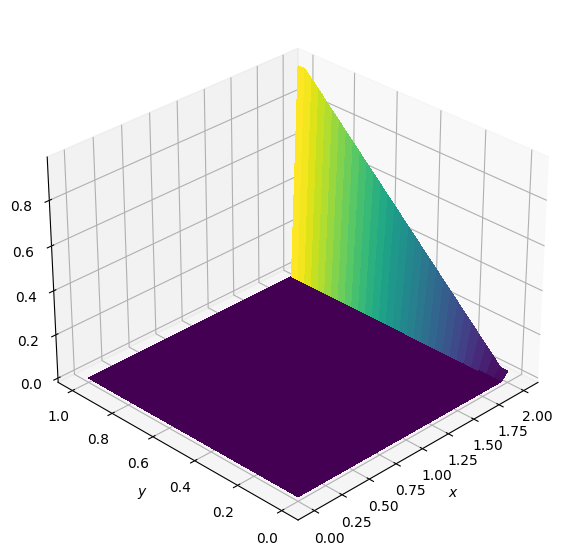

In [109]:
plot2D(x, y, p)

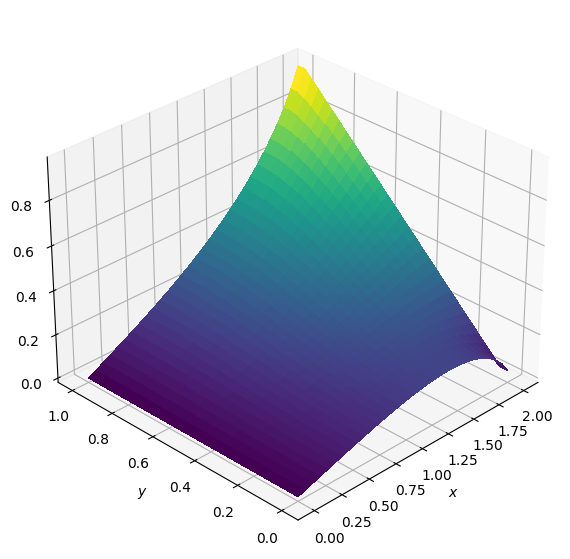

In [110]:
p = laplace2d(p, y, dx, dy, 1e-4)
plot2D(x, y, p)

In [150]:
p = np.zeros((ny, nx))
p = IC2(p)

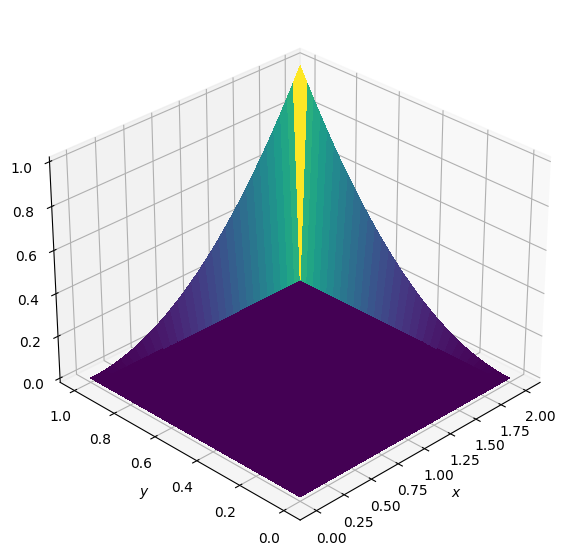

In [151]:
plot2D(x, y, p)

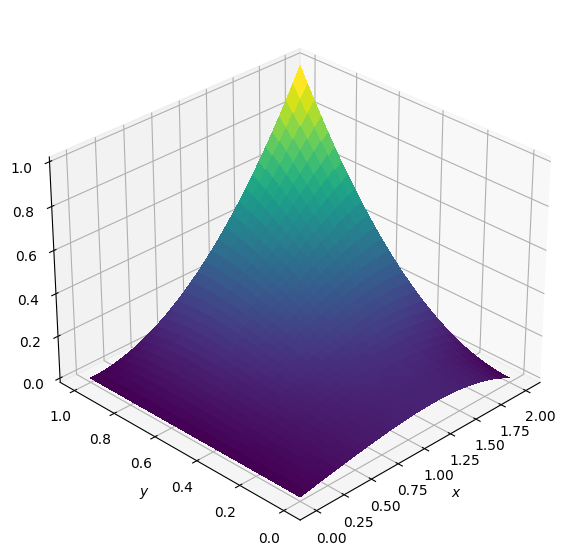

In [153]:
p = laplace2d(p, y, dx, dy, 1e-4)
plot2D(x, y, p)

In [158]:
p = np.zeros((ny, nx))
p = IC3(p)

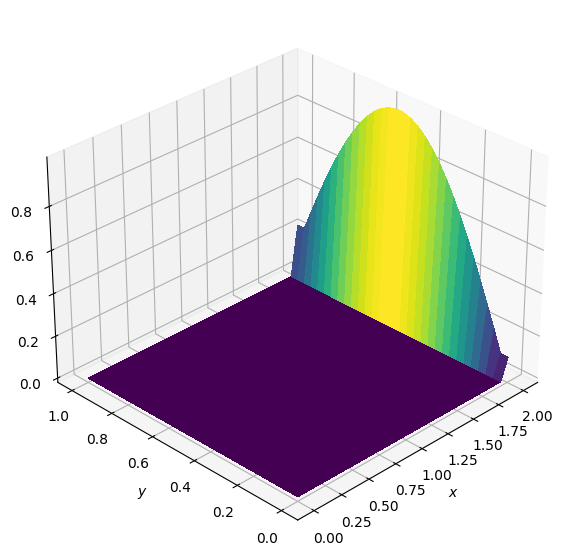

In [159]:
plot2D(x, y, p)

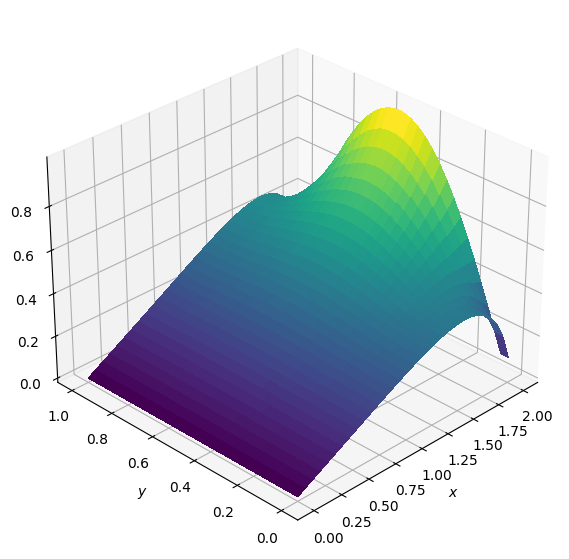

In [161]:
p = laplace2d(p, y, dx, dy, 1e-4)
plot2D(x, y, p)